In [2]:
from pipe import *
from matplotlib import pyplot as plt

In [3]:
filename='./snapshot_002.hdf5'
my_snapshot=read_Gadget4(filename)
my_pos=my_snapshot.read_pos()

In [8]:
np.mod(100,7)

np.int64(2)

In [17]:
NN=100
size=7

In [20]:
local_size =int(NN/ size)
extra = np.mod(NN, size)
for rank in range(8):
    extra = np.mod(NN, size)
    if (rank < extra):
        local_size = local_size + 1
        start_idx = rank * local_size
    else:
        start_idx = rank * local_size + extra + 1

    end_idx = start_idx + local_size - 1
    print(rank,start_idx,end_idx)

0 0 14
1 16 31
2 35 50
3 51 66
4 67 82
5 83 98
6 99 114
7 115 130


In [12]:
14*7

98

In [4]:
nn=32**3
my_pos=np.random.uniform(0,300,size=(nn,3))

In [5]:
my_2pct=twopcf(my_pos,boxscale=[0,my_snapshot.boxsize])

In [6]:
psi,array=my_2pct.Natural(bins=30)
DP_psi,array=my_2pct.DP(bins=30)
Hamilton_psi,array=my_2pct.Hamilton(bins=30)
LS_psi,array=my_2pct.LS(bins=30)

  0%|          | 0/32768 [00:00<?, ?it/s]

100%|██████████| 32768/32768 [00:11<00:00, 2977.24it/s] 


make DD done


  0%|          | 3149/655360 [00:42<2:25:06, 74.91it/s]


KeyboardInterrupt: 

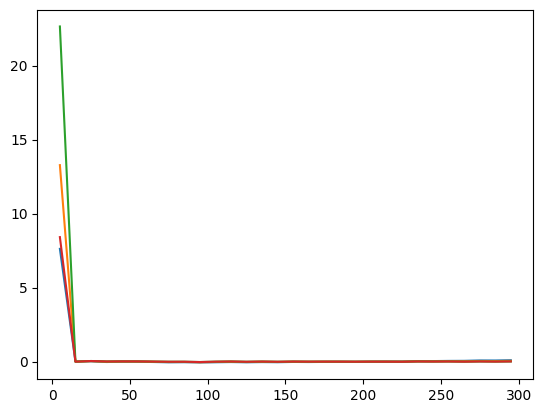

In [11]:
plt.plot(array,psi)
plt.plot(array,DP_psi)
plt.plot(array,Hamilton_psi)
plt.plot(array,LS_psi)